In [1]:
# Copyright (c) 2022 Massachusetts Institute of Technology
# SPDX-License-Identifier: MIT

# Evaluation Within a Notebook

In [2]:
import logging
import os
import sys
from pathlib import Path

import configs
import hydra
import pytorch_lightning as pl
import torch as tr
from rai_toolbox.mushin.workflows import RobustnessCurve

# Need add current working directory to the python path
os.environ["PYTHONPATH"] = f"{os.getcwd()}:{os.getenv('PYTHONPATH')}"
logging.disable(sys.maxsize)

## Define the Robustness Curve Workflow

In [3]:
# Implement the evaluation task for RobustnessCurv
class MadryLabRobustness(RobustnessCurve):
    @staticmethod
    def evaluation_task(
        seed: int, trainer: pl.Trainer, module: pl.LightningModule
    ) -> None:
        pl.seed_everything(seed)
        trainer.test(module)
        return tr.load("test_metrics.pt")

## Run the Experiment

In [4]:
robustness_job = MadryLabRobustness(configs.Config)
robustness_job.run(
    epsilon=[0, 0.25, 0.5, 1.0, 2.0], ckpt="mitll_cifar_nat.pt, mitll_cifar_l2_1_0.pt"
)

/home/justin_goodwin/.conda/envs/raiden/lib/python3.8/site-packages/pytorch_lightning/loops/utilities.py:91: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(


Files already downloaded and verified
Files already downloaded and verified
[2022-04-28 14:34:47,313][rai_toolbox.mushin._utils][INFO] - Loading model checkpoint from /home/justin_goodwin/.torch/models/mitll_cifar_nat.pt
[2022-04-28 14:34:47,460][__main__][INFO] - Rank 1: Launched subprocess using Training.test
[2022-04-28 14:34:47,467][torch.distributed.distributed_c10d][INFO] - Added key: store_based_barrier_key:1 to store for rank: 1
[2022-04-28 14:34:47,477][torch.distributed.distributed_c10d][INFO] - Rank 1: Completed store-based barrier for key:store_based_barrier_key:1 with 2 nodes.


Global seed set to 12219
Initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/2
Missing logger folder: /home/justin_goodwin/projects/raiden/rai_toolbox/experiments/madry/multirun/2022-04-28/14-34-40/0/lightning_logs
LOCAL_RANK: 1 - CUDA_VISIBLE_DEVICES: [0,1]
/home/justin_goodwin/.conda/envs/raiden/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:330: PossibleUserWarning: Using `DistributedSampler` with the dataloaders. During `trainer.test()`, it is recommended to use `Trainer(devices=1)` to ensure each sample/batch gets evaluated exactly once. Otherwise, multi-device settings use `DistributedSampler` that replicates some samples to make sure all devices have same batch size in case of uneven inputs.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      Test/Accuracy         0.9524999856948853
        Test/Loss           0.19557517766952515
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Files already downloaded and verified
Files already downloaded and verified
[2022-04-28 14:36:05,358][rai_toolbox.mushin._utils][INFO] - Loading model checkpoint from /home/justin_goodwin/.torch/models/mitll_cifar_l2_1_0.pt
[2022-04-28 14:36:05,516][__main__][INFO] - Rank 1: Launched subprocess using Training.test
[2022-04-28 14:36:05,523][torch.distributed.distributed_c10d][INFO] - Added key: store_based_barrier_key:1 to store for rank: 1
[2022-04-28 14:36:05,534][torch.distributed.distribute

Global seed set to 12219
Initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/2
Missing logger folder: /home/justin_goodwin/projects/raiden/rai_toolbox/experiments/madry/multirun/2022-04-28/14-34-40/1/lightning_logs
LOCAL_RANK: 1 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      Test/Accuracy         0.8162000179290771
        Test/Loss            0.582642674446106
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Files already downloaded and verified


Global seed set to 12219
Initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/2
Missing logger folder: /home/justin_goodwin/projects/raiden/rai_toolbox/experiments/madry/multirun/2022-04-28/14-34-40/2/lightning_logs


Files already downloaded and verified
[2022-04-28 14:37:23,166][rai_toolbox.mushin._utils][INFO] - Loading model checkpoint from /home/justin_goodwin/.torch/models/mitll_cifar_nat.pt
[2022-04-28 14:37:23,319][__main__][INFO] - Rank 1: Launched subprocess using Training.test
[2022-04-28 14:37:23,326][torch.distributed.distributed_c10d][INFO] - Added key: store_based_barrier_key:1 to store for rank: 1
[2022-04-28 14:37:23,336][torch.distributed.distributed_c10d][INFO] - Rank 1: Completed store-based barrier for key:store_based_barrier_key:1 with 2 nodes.


LOCAL_RANK: 1 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      Test/Accuracy         0.1347000002861023
        Test/Loss            9.855376243591309
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Files already downloaded and verified


Global seed set to 12219
Initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/2
Missing logger folder: /home/justin_goodwin/projects/raiden/rai_toolbox/experiments/madry/multirun/2022-04-28/14-34-40/3/lightning_logs


Files already downloaded and verified
[2022-04-28 14:38:40,773][rai_toolbox.mushin._utils][INFO] - Loading model checkpoint from /home/justin_goodwin/.torch/models/mitll_cifar_l2_1_0.pt
[2022-04-28 14:38:40,929][__main__][INFO] - Rank 1: Launched subprocess using Training.test
[2022-04-28 14:38:40,936][torch.distributed.distributed_c10d][INFO] - Added key: store_based_barrier_key:1 to store for rank: 1
[2022-04-28 14:38:40,947][torch.distributed.distributed_c10d][INFO] - Rank 1: Completed store-based barrier for key:store_based_barrier_key:1 with 2 nodes.


LOCAL_RANK: 1 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      Test/Accuracy         0.7572000026702881
        Test/Loss           0.6963142156600952
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Files already downloaded and verified
Files already downloaded and verified
[2022-04-28 14:39:58,358][rai_toolbox.mushin._utils][INFO] - Loading model checkpoint from /home/justin_goodwin/.torch/models/mitll_cifar_nat.pt
[2022-04-28 14:39:58,513][__main__][INFO] - Rank 1: Launched subprocess using Training.test
[2022-04-28 14:39:58,531][torch.distributed.distributed_c10d][INFO] - Added key: store_based_barrier_key:1 to store for rank: 1
[2022-04-28 14:39:58,541][torch.distributed.distributed_c1

Global seed set to 12219
Initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/2
Missing logger folder: /home/justin_goodwin/projects/raiden/rai_toolbox/experiments/madry/multirun/2022-04-28/14-34-40/4/lightning_logs
LOCAL_RANK: 1 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      Test/Accuracy        0.008700000122189522
        Test/Loss            16.71694564819336
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Files already downloaded and verified
Files already downloaded and verified
[2022-04-28 14:41:15,918][rai_toolbox.mushin._utils][INFO] - Loading model checkpoint from /home/justin_goodwin/.torch/models/mitll_cifar_l2_1_0.pt
[2022-04-28 14:41:16,078][__main__][INFO] - Rank 1: Launched subprocess using Training.test
[2022-04-28 14:41:16,087][torch.distributed.distributed_c10d][INFO] - Added key: store_based_barrier_key:1 to store for rank: 1
[2022-04-28 14:41:16,097][torch.distributed.distribute

Global seed set to 12219
Initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/2
Missing logger folder: /home/justin_goodwin/projects/raiden/rai_toolbox/experiments/madry/multirun/2022-04-28/14-34-40/5/lightning_logs
LOCAL_RANK: 1 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      Test/Accuracy          0.690500020980835
        Test/Loss           0.8335583806037903
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Files already downloaded and verified
Files already downloaded and verified
[2022-04-28 14:42:33,550][rai_toolbox.mushin._utils][INFO] - Loading model checkpoint from /home/justin_goodwin/.torch/models/mitll_cifar_nat.pt
[2022-04-28 14:42:33,695][__main__][INFO] - Rank 1: Launched subprocess using Training.test
[2022-04-28 14:42:33,702][torch.distributed.distributed_c10d][INFO] - Added key: store_based_barrier_key:1 to store for rank: 1
[2022-04-28 14:42:33,712][torch.distributed.distributed_c1

Global seed set to 12219
Initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/2
Missing logger folder: /home/justin_goodwin/projects/raiden/rai_toolbox/experiments/madry/multirun/2022-04-28/14-34-40/6/lightning_logs
LOCAL_RANK: 1 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      Test/Accuracy        9.999999747378752e-05
        Test/Loss            21.85608673095703
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Files already downloaded and verified
Files already downloaded and verified
[2022-04-28 14:43:51,326][rai_toolbox.mushin._utils][INFO] - Loading model checkpoint from /home/justin_goodwin/.torch/models/mitll_cifar_l2_1_0.pt
[2022-04-28 14:43:51,507][__main__][INFO] - Rank 1: Launched subprocess using Training.test
[2022-04-28 14:43:51,515][torch.distributed.distributed_c10d][INFO] - Added key: store_based_barrier_key:1 to store for rank: 1
[2022-04-28 14:43:51,526][torch.distributed.distribut

Global seed set to 12219
Initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/2
Missing logger folder: /home/justin_goodwin/projects/raiden/rai_toolbox/experiments/madry/multirun/2022-04-28/14-34-40/7/lightning_logs
LOCAL_RANK: 1 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      Test/Accuracy         0.5396999716758728
        Test/Loss           1.2052090167999268
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Files already downloaded and verified


Global seed set to 12219
Initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/2
Missing logger folder: /home/justin_goodwin/projects/raiden/rai_toolbox/experiments/madry/multirun/2022-04-28/14-34-40/8/lightning_logs


Files already downloaded and verified
[2022-04-28 14:45:10,287][rai_toolbox.mushin._utils][INFO] - Loading model checkpoint from /home/justin_goodwin/.torch/models/mitll_cifar_nat.pt
[2022-04-28 14:45:10,468][__main__][INFO] - Rank 1: Launched subprocess using Training.test
[2022-04-28 14:45:10,495][torch.distributed.distributed_c10d][INFO] - Added key: store_based_barrier_key:1 to store for rank: 1
[2022-04-28 14:45:10,515][torch.distributed.distributed_c10d][INFO] - Rank 1: Completed store-based barrier for key:store_based_barrier_key:1 with 2 nodes.


LOCAL_RANK: 1 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      Test/Accuracy                 0.0
        Test/Loss            24.6280460357666
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Files already downloaded and verified
Files already downloaded and verified
[2022-04-28 14:46:27,944][rai_toolbox.mushin._utils][INFO] - Loading model checkpoint from /home/justin_goodwin/.torch/models/mitll_cifar_l2_1_0.pt
[2022-04-28 14:46:28,103][__main__][INFO] - Rank 1: Launched subprocess using Training.test
[2022-04-28 14:46:28,111][torch.distributed.distributed_c10d][INFO] - Added key: store_based_barrier_key:1 to store for rank: 1
[2022-04-28 14:46:28,121][torch.distributed.distributed_c10d][I

Global seed set to 12219
Initializing distributed: GLOBAL_RANK: 1, MEMBER: 2/2
Missing logger folder: /home/justin_goodwin/projects/raiden/rai_toolbox/experiments/madry/multirun/2022-04-28/14-34-40/9/lightning_logs
LOCAL_RANK: 1 - CUDA_VISIBLE_DEVICES: [0,1]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      Test/Accuracy         0.22220000624656677
        Test/Loss           2.5071699619293213
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


## Plot the Results

[[<matplotlib.lines.Line2D at 0x7fd3c7147af0>],

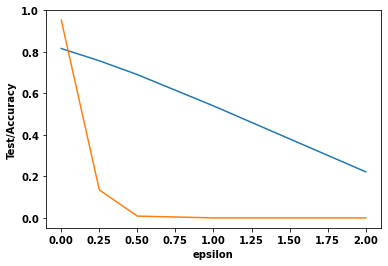

In [5]:
robustness_job.plot("Test/Accuracy", group="ckpt")

## Load an Experiment

[[<matplotlib.lines.Line2D at 0x7fd3bf477d60>],

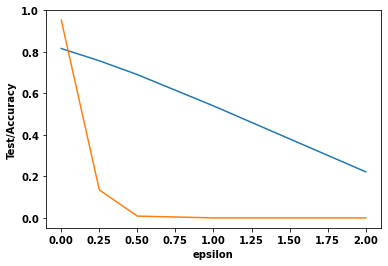

In [8]:
robustness_job_no_run = MadryLabRobustness(configs.Config)

# Provide the experiment directory of a recent RobustnessCurve run
exp_dir = robustness_job.working_dir  # you can provide any directory here
robustness_job_no_run.load_from_dir(exp_dir, workflow_params=["epsilon", "ckpt"])
robustness_job_no_run.plot("Test/Accuracy", group="ckpt")

## Other Outputs

### If you have Pandas

In [9]:
robustness_job.to_dataframe()

,Test/Loss,Test/Accuracy,epsilon,ckpt
0,0.195575,0.9525,0.00,mitll_cifar_nat.pt
1,0.582643,0.8162,0.00,mitll_cifar_l2_1_0.pt
2,9.855376,0.1347,0.25,mitll_cifar_nat.pt
3,0.696314,0.7572,0.25,mitll_cifar_l2_1_0.pt
4,16.716946,0.0087,0.50,mitll_cifar_nat.pt
5,0.833558,0.6905,0.50,mitll_cifar_l2_1_0.pt
6,21.856087,0.0001,1.00,mitll_cifar_nat.pt
7,1.205209,0.5397,1.00,mitll_cifar_l2_1_0.pt
8,24.628046,0.0000,2.00,mitll_cifar_nat.pt
9,2.507170,0.2222,2.00,mitll_cifar_l2_1_0.pt


### If you have xarray

In [10]:
robustness_job.to_xarray()

<xarray.Dataset>
Dimensions:        (x: 10)
Coordinates:
    epsilon        (x) float64 0.0 0.0 0.25 0.25 0.5 0.5 1.0 1.0 2.0 2.0
    ckpt           (x) <U21 'mitll_cifar_nat.pt' ... 'mitll_cifar_l2_1_0.pt'
Dimensions without coordinates: x
Data variables:
    Test/Loss      (x) float64 0.1956 0.5826 9.855 0.6963 ... 1.205 24.63 2.507
    Test/Accuracy  (x) float64 0.9525 0.8162 0.1347 0.7572 ... 0.5397 0.0 0.2222

In [11]:
xdata = robustness_job.to_xarray()

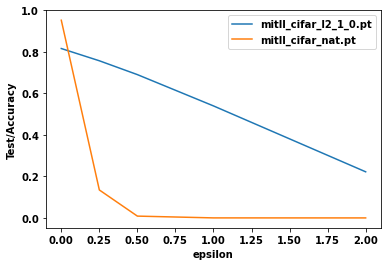

In [12]:
import matplotlib.pyplot as plt

xdata = robustness_job.to_xarray()
fig, ax = plt.subplots()
for name, g in xdata.groupby("ckpt"):
    g["Test/Accuracy"].plot.line(x="epsilon", ax=ax, label=name)
plt.legend()

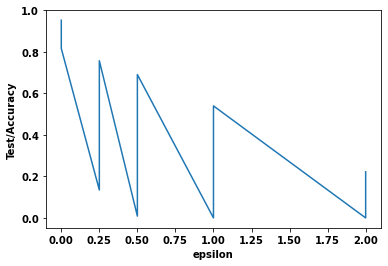

In [13]:
xdata["Test/Accuracy"].plot.line(x="epsilon")